## Radar Chart
A radar chart (or spider plot, or polar chart) allows to visualize one or more series of values over multiple quantitative variables. 

In [119]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
np.set_printoptions(precision=4)

In [248]:
# Set data
yaw_bins = np.arange(0, 360, 15)
num_bins = len(yaw_bins)
# yaw_labels = [f'{start}-{end}' for start, end in zip(yaw_bins[:-1], yaw_bins[1:])]
yaw_labels = [str(yaw) for yaw in yaw_bins]
# yaw_labels = yaw_labels[num_bins//2:] + yaw_labels[:num_bins//2]


data = {
    'FSM': np.random.rand(num_bins),
#     'SurroundDepth': np.random.rand(num_bins),
    'PanoDepth(ours)': np.random.rand(num_bins),    
}
    
df = pd.DataFrame(data, index=yaw_labels).T

In [249]:
df

,0,15,30,45,60,75,90,105,120,135,...,210,225,240,255,270,285,300,315,330,345
FSM,0.273272,0.148864,0.190700,0.164495,0.721189,0.610274,0.825512,0.913515,0.275526,0.576438,...,0.356432,0.489922,0.494792,0.480251,0.922629,0.763398,0.791737,0.899537,0.242578,0.045722
PanoDepth(ours),0.424003,0.882352,0.377373,0.587761,0.939141,0.696671,0.333901,0.160676,0.958142,0.193766,...,0.385688,0.830067,0.751090,0.287693,0.268491,0.824488,0.917446,0.839620,0.388472,0.017267


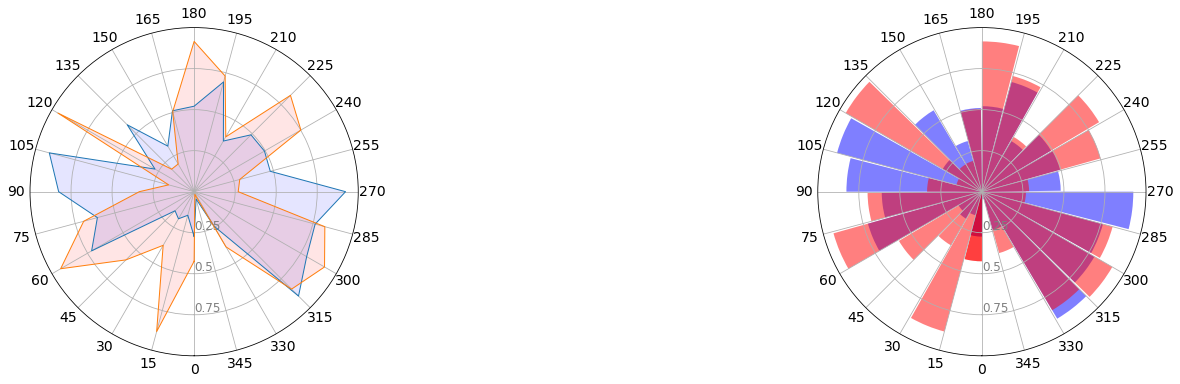

In [250]:
# ------- PART 1: Create background
 
y_ticks = [0.25, 0.5, 0.75]
# y_ticks_labels = [str(n) for n in y_ticks]
y_ticks_labels = y_ticks

# number of variable
categories=list(df)
# N = len(categories) * 2
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, polar=True)
ax2 = fig.add_subplot(133, polar=True)
# ax = plt.subplot(131, polar=True, figsize=(10, 10))

xfont = {'color':"black", 'size': 14}
yfont = {'color':"grey", 'size': 12}

# Draw one axe per variable + add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, **xfont)

# ax.set_yticks(y_ticks, y_ticks_labels, color="grey", size=7)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks_labels, **yfont)
ax.set_ylim(0, 1.0)

# ax2 = plt.subplot(133, polar=True, figsize=(10, 10))

# Draw one axe per variable + add labels
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, **xfont)
# plt.xticks(angles[:-1:2], categories)
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(y_ticks_labels, **yfont)
ax2.set_ylim(0, 1.0)

 
# If you want the first axis to be on top:
ax.set_theta_offset(- pi / 2)
ax.set_theta_direction(-1)
ax2.set_theta_offset(- pi / 2)
ax2.set_theta_direction(-1)
 
 
# Draw ylabels
ax.set_rlabel_position(0)
ax2.set_rlabel_position(0)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

methods = list(df.T)
colors = ['b', 'r', 'g']

for idx, (method, color) in enumerate(zip(methods, colors)):
    values = df.iloc[idx].tolist()
    values += values[:1]
    
#     values_np = np.array(values)
#     values_avg = ((values_np[:-1] + values_np[1:]) / 2).tolist() + [(values[0] + values[-1]) / 2]
#     values_dense = np.vstack([values, values_avg]).T.reshape(-1).tolist()
#     values_dense += values_dense[:1]

#     ax.plot(angles, values_dense, linewidth=1, linestyle='solid', label=method)
#     ax.fill(angles, values_dense, color, alpha=0.1)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=method)
    ax.fill(angles, values, color, alpha=0.1)
    ax2.bar(angles, values, color=color, alpha=0.5, width=0.25, zorder=idx, align='edge', label=method)
  
# Add legend
# plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
# plt.legend(loc='best')

# Show the graph
plt.show()

## Circular barplot

In [182]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [191]:
data = {
    'region': ['Central Cascades', 'Central Washington', 'Eastern Washington', 'Issaquah Alps', 'Mount Rainier Area'],
    'sum_length': [2130.85, 453.3, 1333.64, 383.11, 1601.8],
    'mean_gain': [2260.00, 814.0, 1591.00, 973.00, 1874.0],
    'n': [226.00, 80.0, 143.00, 77.00, 196.0],
}

summary_all = pd.DataFrame(data)

In [197]:
summary_all

,region,sum_length,mean_gain,n
0,Central Cascades,2130.85,2260.0,226.0
1,Central Washington,453.30,814.0,80.0
2,Eastern Washington,1333.64,1591.0,143.0
3,Issaquah Alps,383.11,973.0,77.0
4,Mount Rainier Area,1601.80,1874.0,196.0


In [192]:
# Bars are sorted by the cumulative track length
df_sorted = summary_all.sort_values("sum_length", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["sum_length"].values

# Mean gain length
MEAN_GAIN = df_sorted["mean_gain"].values

# Region label
REGION = df_sorted["region"].values

# Number of tracks per region
TRACKS_N = df_sorted["n"].values

In [200]:
GREY12 = "#1f1f1f"

# # Set default font to Bell MT
# plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

findfont: Font family ['Bell MT'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bell MT'] not found. Falling back to DejaVu Sans.


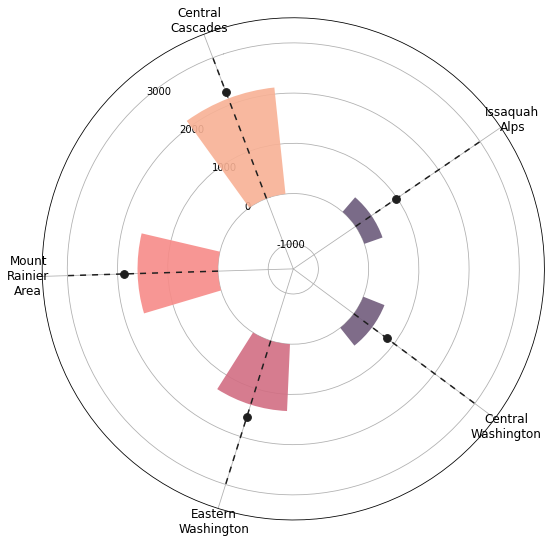

In [194]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12);